In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels.idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images.idx3-ubyte'
                               % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train_orig, Y_train_orig =  load_mnist("", kind = "train")
X_test_orig, Y_test_orig = load_mnist("", kind ="t10k")

In [4]:
print("X_train_orig's shape:" + str(X_train_orig.shape))
print("Y_train_orig's shape:" + str(Y_train_orig.shape))
print("X_test_orig's shape:" + str(X_test_orig.shape))
print("Y_test_orig's shape:" + str(Y_test_orig.shape))

X_train_orig's shape:(60000, 784)
Y_train_orig's shape:(60000,)
X_test_orig's shape:(10000, 784)
Y_test_orig's shape:(10000,)


In [5]:
X_train_orig[Y_train_orig==1].shape

(6742, 784)

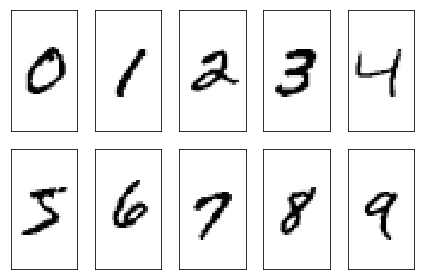

In [6]:
fig, ax = plt.subplots(
    nrows = 2,
    ncols = 5,
    sharex = True,
    sharey = True, )

ax = ax.flatten()
for i in range(10):
    img = X_train_orig[Y_train_orig == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap="Greys", interpolation="nearest")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()
    

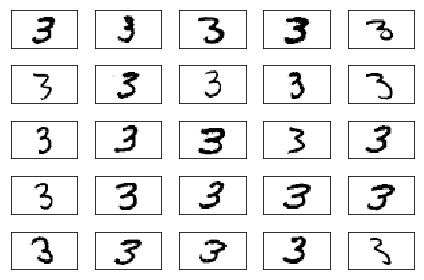

In [7]:
fig, ax = plt.subplots(
    nrows = 5,
    ncols = 5,
    sharex = True,
    sharey = True, )

ax = ax.flatten()
for i in range(25):
    img = X_train_orig[Y_train_orig == 3][i].reshape(28, 28)
    ax[i].imshow(img, cmap="Greys", interpolation="nearest")

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [8]:
def convert_to_one_hot(Y, C):
    # Y.reshape(-1)表示坍缩为一维数组
    # np.eye(10)[Y],其中Y为一维数组,[Y]为二维数组,产生Y.shape * 10的one-hot 矩阵,Y中记录着每一行1的偏移量
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [9]:
X_train = X_train_orig.T/255
Y_train = convert_to_one_hot(Y_train_orig.T, 10)

X_test = X_test_orig.T/255
Y_test = convert_to_one_hot(Y_test_orig.T, 10)

print("X_train's shape:" + str(X_train.shape))
print("Y_train's shape:" + str(Y_train.shape))
print("X_test's shape:" + str(X_test.shape))
print("Y_test's shape:" + str(Y_test.shape))

X_train's shape:(784, 60000)
Y_train's shape:(10, 60000)
X_test's shape:(784, 10000)
Y_test's shape:(10, 10000)


In [10]:
X_train[:,1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [11]:
Y_train[:,0:13]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [13]:
def softmax(x):
    s = np.exp(x)/np.sum(np.exp(x))
    return s

In [56]:
softmax([0.000001,0.000002,0.000003,0.000004])

array([ 0.24999963,  0.24999987,  0.25000012,  0.25000038])

In [14]:
def relu(x):
    s = np.maximum(0, x)
    return s

In [15]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 1):
    np.random.seed(seed)
    m = X.shape[1]
    mini_batches = []
    
    permutation = list(np.random.permutation(m)) # 将0 - m-1一共m的数字随机顺序排列
    shuffled_X = X[:, permutation] # 将X，Y的数据顺序打乱
    shuffled_Y = Y[:, permutation]
    
    num_complete_minibatches = m//mini_batch_size # 完整的mini_batch的个数
    for i in range(num_complete_minibatches):
        mini_batch_X = shuffled_X[:, i*mini_batch_size : (i+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, i*mini_batch_size : (i+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # 处理多余的项
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, mini_batch_size * num_complete_minibatches : ]
        mini_batch_Y = shuffled_Y[:, mini_batch_size * num_complete_minibatches : ]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

In [16]:
def initialize_parameters():
    np.random.seed(2)
    parameters = {}
    # parameters['W1'] = np.zeros((512, 784))
    parameters['W1'] = np.random.randn(512, 784) * np.sqrt(1 / 784)
    parameters['b1'] = np.zeros((512, 1))
    # parameters['W2'] = np.zeros((256, 512))
    parameters['W2'] = np.random.randn(256, 512) * np.sqrt(1 / 512)
    parameters['b2'] = np.zeros((256, 1))
    # parameters['W3'] = np.zeros((10, 256))
    parameters['W3'] = np.random.randn(10, 256) * np.sqrt(1 / 256)
    parameters['b3'] = np.zeros((10, 1)) 
    
    return parameters

In [34]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]    
    
    Z1 = np.dot(W1, X) + b1
    # A1 = relu(Z1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    # A2 = relu(Z2) 
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) 
    return A3, cache

In [18]:
# parameters = initialize_parameters()
# A3, cache = forward_propagation(X_train, parameters)
# cost = softmax_compute_cost(A3, Y_train)
# grads = backward_propagation(X_train, Y_train, cache)

In [19]:
def softmax_compute_cost(A3, Y):
    m = Y.shape[1]

    logprobs = np.log(A3) * Y
    cost = -1/m * np.sum(logprobs)
    
    return cost

In [35]:
def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)  = cache
    
    dZ3 = A3 - Y
    dW3 = 1/m * np.dot(dZ3, A2.T)
    db3 = 1/m * np.sum(dZ3, axis = 1, keepdims = True)

    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * A2 * (1-A2)
    # relu
    # dZ2 = np.array(dA2, copy=True)
    # dZ2[Z2 <= 0] = 0
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * A1 * (1-A1)
    # relu
    # dZ1 = np.array(dA1, copy=True)
    # dZ1[Z1 <= 0] = 0    
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)     

    grads = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
             "dA2": dA2,"dZ2": dZ2, "dW2": dW2, "db2": db2,
             "dA1": dA1,"dZ1": dZ1, "dW1": dW1, "db1": db1
            }
    return grads

In [36]:
def initialize_velocity(parameters) :

    v = {}
    
    v["dW1"] = np.zeros(parameters["W1"].shape)
    v["db1"] = np.zeros(parameters["b1"].shape)

    v["dW2"] = np.zeros(parameters["W2"].shape)
    v["db2"] = np.zeros(parameters["b2"].shape)
    
    v["dW3"] = np.zeros(parameters["W3"].shape)
    v["db3"] = np.zeros(parameters["b3"].shape)
    
    return v

In [37]:
def update_parameters(parameters, grads,learning_rate):
    for l in range(3):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)] 
    return parameters

In [38]:
def update_parameters_momentum(parameters, grads, v, t, beta, learning_rate):
    v_corrected = {}
    
    for l in range(3):
        # 从0开始到2, 下标从1开始
        v["dW" + str(l+1)] = beta * v["dW" + str(l+1)] + (1-beta)* grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta * v["db" + str(l+1)] + (1-beta)* grads["db" + str(l+1)]
        
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 -beta ** t )
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 -beta ** t )    
        
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v_corrected["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v_corrected["db" + str(l+1)]
    return parameters, v

In [39]:
def model_MNIST(X, Y, learning_rate = 0.0007, mini_batch_size =128, beta = 0.9,
               num_epochs = 10):
    costs = []
    seed = 10
    t = 0
    
    parameters = initialize_parameters()
    
    v = initialize_velocity(parameters)
    
    for i in range(num_epochs):
        seed = seed + 1
        # 产生随机性
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        
        for minibatch in minibatches:
                        
            (minibatch_X, minibatch_Y) = minibatch

            A3, cache = forward_propagation(minibatch_X, parameters)

            cost = softmax_compute_cost(A3, minibatch_Y)
            
            grads = backward_propagation(minibatch_X, minibatch_Y, cache)

            t = t + 1
            # parameters = update_parameters(parameters, grads, learning_rate)
            parameters, v = update_parameters_momentum(parameters, grads, v, t, beta, learning_rate)
        
        if i % 2 == 0:
            print("Cost after epoch %i : %f" %(i, cost))
            costs.append(cost)   
        
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 2)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    
    return parameters, v, grads

In [ ]:
parameters, v, grads = model_MNIST(X_train, Y_train,num_epochs = 10,mini_batch_size =32)

In [30]:
def predict (X, y, parameters):
    m = X.shape[1]
    n = len(parameters)
    y_hat = np.zeros((10,m))
    prob = 0
    # A3 (10,60000)
    A3, cache = forward_propagation(X, parameters)
    
    for i in range(m):
        y_hat[:,i] = (A3[:,i] == np.max(A3[:,i]))
        if (np.sum(np.abs(y_hat[:,i] - y[:,i])) == 0):
            prob += 1
    print("Accuracy: "  + str(prob/m))
    
    return y_hat

In [31]:
y_hat = predict(X_train, Y_train, parameters)

Accuracy: 0.29375


In [32]:
y_hat[6,1:100]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.])